In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from google.colab import files

Matthew Chan

Question 1 
Write a loss function that can be used for each of the models below. Please write down the
formulas. No coding is needed. 

L1 Regularized Linear Regression Loss Function is Mean Squared Error

$$MSE(y,\hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y_{i}})^{2} + \lambda||\theta||$$
https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-error



L2 Logistic Regression Equation Loss Function is cross entropy

$$L_{log}(y, p) = -(ylog(p) + (1-y)log(1-p)) + \lambda \sum_{i=1}^{n}\theta^{2}$$

https://blmoistawinde.github.io/ml_equations_latex/

Question 2

I used **Logistic regression model L1** with a high
lambda. L1 regression model with high lambda is well suited for feature extractions in a large dataset where it sets the weights of non relevant features to 0. As a result , it will end up with a small collection of features which is effective for machine learning such as prediction and classification. 

Question 3 

In [43]:
#uploaded = files.upload()

train_data = pd.read_csv("train_diabetes.csv", index_col = 0)
#data = pd.read_csv(io.BytesIO(uploaded['train_diabetes.csv']))

Y_train = train_data.drop("Pregnancies", axis = 1)
Y_train = Y_train . drop("Glucose", axis = 1)
Y_train = Y_train . drop("BloodPressure", axis = 1)
Y_train = Y_train . drop("SkinThickness", axis = 1)
Y_train = Y_train . drop("Insulin", axis = 1)
Y_train = Y_train . drop("BMI", axis = 1)
Y_train = Y_train . drop("DiabetesPedigreeFunction", axis = 1)
Y_train = Y_train . drop("Age", axis = 1)
Y_train.head()
X_train = train_data.drop("Outcome", axis=1)
X_train.head()

validation_data = pd.read_csv("val_diabetes.csv", index_col=0)
 
Y_val = validation_data.drop("Pregnancies", axis = 1)
Y_val = Y_val. drop("Glucose", axis = 1)
Y_val = Y_val. drop("BloodPressure", axis = 1)
Y_val = Y_val. drop("SkinThickness", axis = 1)
Y_val = Y_val. drop("Insulin", axis = 1)
Y_val = Y_val. drop("BMI", axis = 1)
Y_val = Y_val. drop("DiabetesPedigreeFunction", axis = 1)
Y_val = Y_val. drop("Age", axis = 1)
Y_val.head()
 
X_val= validation_data.drop("Outcome", axis=1)
X_val.head() 
 
test_data = pd.read_csv("test_diabetes.csv", index_col=0)
 
Y_test = test_data.drop("Pregnancies", axis = 1)
Y_test = Y_test. drop("Glucose", axis = 1)
Y_test = Y_test. drop("BloodPressure", axis = 1)
Y_test = Y_test. drop("SkinThickness", axis = 1)
Y_test = Y_test. drop("Insulin", axis = 1)
Y_test = Y_test. drop("BMI", axis = 1)
Y_test = Y_test. drop("DiabetesPedigreeFunction", axis = 1)
Y_test = Y_test. drop("Age", axis = 1)


X_test = test_data.drop("Outcome", axis=1)
X_test.head()
Y_test.head()


X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
552,6,114,88,0,0,27.8,0.247,66
191,9,123,70,44,94,33.1,0.374,40
406,4,115,72,0,0,28.9,0.376,46
482,4,85,58,22,49,27.8,0.306,28
719,5,97,76,27,0,35.6,0.378,52


The dataset contains 8 columns that are useful for analysis: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI , DiabetesBedigreeFunction, and Age. The id column is dropped because it is not useful. All the 8 features that I selected as part of the metrics are highly related or risk factors to diabetes. As stated, this is a binary classification problem with a goal to predict whether an individual has diabetes indicated by Outcome variable based on the rest of the features. It is a binary classification problem, therefore the appropriate Model evaluation metrics are confusion matrix, accuracy, and F1 score.

Question 4 
Implement a L2-regularized logistic regression model to train stochastic gradient descent to return the loss from 500 epochs of training (Hint: First try implementing without regularization, then add the regularization terms). (15 pts)

In [44]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
X_val = X_val.values
Y_val = Y_val.values

In [45]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])
X_val = X_val.T
Y_val = Y_val.reshape(1, X_val.shape[1])

In [46]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)
print("Shape of X_val : ", X_val.shape)
print("Shape of Y_val : ", Y_val.shape)

Shape of X_train :  (8, 460)
Shape of Y_train :  (1, 460)
Shape of X_test :  (8, 154)
Shape of Y_test :  (1, 154)
Shape of X_val :  (8, 154)
Shape of Y_val :  (1, 154)


In [47]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [48]:
# When Lambda is 0, that means that there is no regularization inolved.

def model(X_train, Y_train, X_val, Y_val, learning_rate, lambda_value, iterations):
    
    # Number of rows
    m = X_train.shape[1]
    # Number of features
    n = X_train.shape[0]

    # Number of rows of the validation
    m_val = X_val.shape[1]
    # Number of features of validation
    n_val = X_val.shape[0]
    
    Weights = np.zeros((n,1))

    B = 0
    
    cost_list = []
    #  validation cost to the same model function as the training cost
    cost_list_validation = []
    
    for i in range(iterations):
        
        Z = np.dot(Weights.T, X_train) + B
        sigmoid_value = sigmoid(Z)
       
        # cost function
        cost = -(1/m)*np.sum( Y_train*np.log(sigmoid_value) + (1-Y_train)*np.log(1-sigmoid_value)) + (2*lambda_value/m) *np.sum(np.square(Weights))
        
        Z_val = np.dot(Weights.T, X_val) + B
        sigmoid_value_validation = sigmoid(Z_val)

        # This a separate cost function for the validation data 
        validation_cost = -(1/m_val)*np.sum(Y_val*np.log(sigmoid_value_validation) + (1-Y_val)*np.log(1-sigmoid_value_validation)) + ((2*lambda_value/m_val) *np.sum(np.square(Weights)))
       
        # Gradient Descent
        derivativeW = (1/m)* (np.dot(sigmoid_value -Y_train, X_train.T)) + 2* (lambda_value/ m) * np.sum((Weights))
        derivativeB = (1/m)*np.sum(sigmoid_value  - Y_train)
        
        Weights =  Weights - learning_rate*derivativeW.T
        B = B - learning_rate*derivativeB
        
        # Keeping track of the cost function value
        cost_list.append(cost)
        cost_list_validation.append(validation_cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
            print("cost after  validation", i, "iteration is : ", validation_cost)
        
    return Weights, B, cost_list, cost_list_validation
        

In [49]:
# Training for the model

iterations = 500
learning_rate = 0.0001
lambda_value = 0.1
W, B, cost_list, cost_list_validation = model(X_train, Y_train, X_val, Y_val, learning_rate = learning_rate, lambda_value = lambda_value, iterations = iterations)
 

cost after  0 iteration is :  0.6931471805599452
cost after  validation 0 iteration is :  0.6931471805599454
cost after  50 iteration is :  0.630748906369986
cost after  validation 50 iteration is :  0.6745076358686274
cost after  100 iteration is :  0.6200974052935241
cost after  validation 100 iteration is :  0.6676583181337438
cost after  150 iteration is :  0.6158117104158204
cost after  validation 150 iteration is :  0.66624038393258
cost after  200 iteration is :  0.6138237444331437
cost after  validation 200 iteration is :  0.6662326127318328
cost after  250 iteration is :  0.6127605884046544
cost after  validation 250 iteration is :  0.6665042588513203
cost after  300 iteration is :  0.6121082325748589
cost after  validation 300 iteration is :  0.6667471765702672
cost after  350 iteration is :  0.6116568522994239
cost after  validation 350 iteration is :  0.6668981791590568
cost after  400 iteration is :  0.6113140048288354
cost after  validation 400 iteration is :  0.666964063

In [50]:
iterations = 500
learning_rate = 0.0001
lambda_value = 0.2
W, B, cost_list, cost_list_validation = model(X_train, Y_train, X_val, Y_val, learning_rate = learning_rate, lambda_value = lambda_value, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  validation 0 iteration is :  0.6931471805599454
cost after  50 iteration is :  0.6307489908113468
cost after  validation 50 iteration is :  0.6745078265074211
cost after  100 iteration is :  0.6200975822850359
cost after  validation 100 iteration is :  0.6676587741138478
cost after  150 iteration is :  0.6158119581523004
cost after  validation 150 iteration is :  0.6662410601572714
cost after  200 iteration is :  0.6138240435260348
cost after  validation 200 iteration is :  0.6662334577397185
cost after  250 iteration is :  0.6127609256732724
cost after  validation 250 iteration is :  0.6665052339718929
cost after  300 iteration is :  0.6121085996105403
cost after  validation 300 iteration is :  0.6667482553865254
cost after  350 iteration is :  0.611657243785092
cost after  validation 350 iteration is :  0.6668993440838532
cost after  400 iteration is :  0.6113144173498771
cost after  validation 400 iteration is :  0.6669653

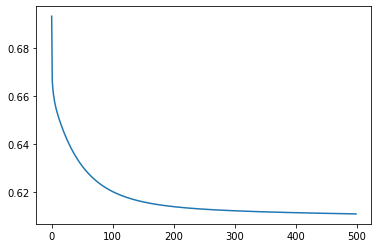

In [51]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [52]:
iterations = 500
learning_rate = 0.0001
lambda_value = 0.3
W, B, cost_list, cost_list_validation = model(X_train, Y_train, X_val, Y_val, learning_rate = learning_rate, lambda_value = lambda_value, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  validation 0 iteration is :  0.6931471805599454
cost after  50 iteration is :  0.6307490752524606
cost after  validation 50 iteration is :  0.6745080171459067
cost after  100 iteration is :  0.6200977592760915
cost after  validation 100 iteration is :  0.6676592300935147
cost after  150 iteration is :  0.6158122058885889
cost after  validation 150 iteration is :  0.6662417363825406
cost after  200 iteration is :  0.6138243426195205
cost after  validation 200 iteration is :  0.6662343027505053
cost after  250 iteration is :  0.6127612629436844
cost after  validation 250 iteration is :  0.6665062090987788
cost after  300 iteration is :  0.6121089666494882
cost after  validation 300 iteration is :  0.6667493342132687
cost after  350 iteration is :  0.6116576352756469
cost after  validation 350 iteration is :  0.6669005090237483
cost after  400 iteration is :  0.6113148298774795
cost after  validation 400 iteration is :  0.666966

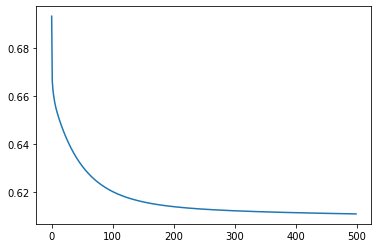

In [53]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [54]:
iterations = 500
learning_rate = 0.001
lambda_value = 0.9
W, B, cost_list, cost_list_validation = model(X_train, Y_train, X_val, Y_val, learning_rate = learning_rate, lambda_value = lambda_value, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  validation 0 iteration is :  0.6931471805599454
cost after  50 iteration is :  1.3198330641999745
cost after  validation 50 iteration is :  1.1334680164744118
cost after  100 iteration is :  4.2788524727159665
cost after  validation 100 iteration is :  5.047154432816166
cost after  150 iteration is :  1.3102352943757887
cost after  validation 150 iteration is :  1.131348810999784
cost after  200 iteration is :  2.7940727366061773
cost after  validation 200 iteration is :  2.2902460825916617
cost after  250 iteration is :  1.8885944710924993
cost after  validation 250 iteration is :  1.5752489912267698
cost after  300 iteration is :  2.0026246236984373
cost after  validation 300 iteration is :  1.703990173298475
cost after  350 iteration is :  0.8839260154684716
cost after  validation 350 iteration is :  0.8384024361856289
cost after  400 iteration is :  4.1885706418024755
cost after  validation 400 iteration is :  4.952010309

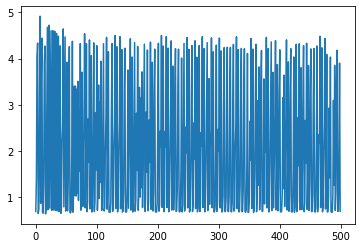

In [55]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [56]:
iterations = 500
learning_rate = 0.0001
lambda_value = 0.9
W, B, cost_list, cost_list_validation = model(X_train, Y_train, X_val, Y_val, learning_rate = learning_rate, lambda_value = lambda_value, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  validation 0 iteration is :  0.6931471805599454
cost after  50 iteration is :  0.6307495818939577
cost after  validation 50 iteration is :  0.6745091609703562
cost after  100 iteration is :  0.6200988212128398
cost after  validation 100 iteration is :  0.6676619659623445
cost after  150 iteration is :  0.6158136923022984
cost after  validation 150 iteration is :  0.6662457937463057
cost after  200 iteration is :  0.6138261371929239
cost after  validation 200 iteration is :  0.6662393728761574
cost after  250 iteration is :  0.6127632866038375
cost after  validation 250 iteration is :  0.6665120599926873
cost after  300 iteration is :  0.6121111689517672
cost after  validation 300 iteration is :  0.666755807393927
cost after  350 iteration is :  0.6116599843215859
cost after  validation 350 iteration is :  0.6669074989802017
cost after  400 iteration is :  0.6113173051808657
cost after  validation 400 iteration is :  0.6669739

Plot the training and validation loss curves. (5 pts)

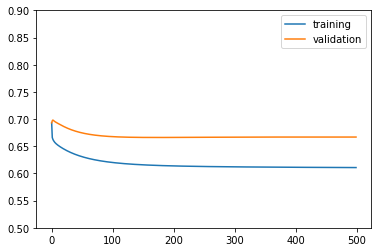

In [57]:

plt.plot(cost_list, label='training')
plt.plot(cost_list_validation, label='validation')
plt.ylim(ymin=0.5,ymax=0.9)
plt.legend()

- Indicate which iteration gives the best model, and explain your decision. (5 pts)

The difference between the validation and training curves are not that much. As shown above from the training and validation curves stop decreasing at around iteration 50 for both training and validation. At around  50 iterations, the loss function starts to converge, therefore 50 iterations is the best.

List and explain your hyperparameter choices (learning rate, regularization parameter). (5
pts)

After testing a couple learning rates and doing some hyperparameter tuning, I noticed that when the learning rate increases past 0.0001, then the cost function starts to blow up. The optimal learning rate is 0.0001 where the cost function converges. Although lambda has very little effect since the weights are very small.

Question 5

Train a logistic regression on the data set with lambda = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, and
0.9, using L2, L1, and Elastic net regularizations on the training and validation set (you should
not use your test set for model tuning). For elastic net, use an L1 ratio of 0.5. Determine the best
lambda(s) and justify your decision (you can use sklearn for these models) (10 pts).
 

In [58]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

In [59]:
Xtrain_values = train_data.iloc[:,:-1].to_numpy()
ytrain_values = train_data.iloc[:,-1].to_numpy()
Xval_values = validation_data.iloc[:,:-1].to_numpy()
yval_values = validation_data.iloc[:,-1].to_numpy()
Xtest_values = test_data.iloc[:,:-1].to_numpy()
ytest_values = test_data.iloc[:,-1].to_numpy()

 

In [60]:
lambdas =[]
for i in np.arange(0.1,1,0.1):
  i = round(i,2)
  lambdas.append(i)
lambdas

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [61]:
ridge_results = {}
lasso_results = {}
elastic_results = {}

for lambda_val in lambdas:    
    # Ridge Regression L2
    l2_ridge = LogisticRegression(penalty='l2', C = 1/lambda_val, solver='liblinear', max_iter=10000)
    l2_ridge.fit(Xtrain_values, ytrain_values)
    pred_y_val = l2_ridge.predict(Xval_values)
    score = f1_score(yval_values,pred_y_val)
    ridge_results[lambda_val] = score
    
    # Lasso Regression L1
    l1_lasso = LogisticRegression(penalty='l1', C = 1/lambda_val, solver='liblinear', max_iter=1000)
    l1_lasso.fit(Xtrain_values, ytrain_values)
    pred_y_val = l1_lasso.predict(Xval_values)
    score = f1_score(yval_values,pred_y_val)
    lasso_results[lambda_val] = score
    
    # Elastic Net 
    lr_elastic = LogisticRegression(penalty='elasticnet', C = 1/lambda_val, solver='saga', l1_ratio=0.5, max_iter=1000)
    lr_elastic.fit(Xtrain_values, ytrain_values)
    pred_y_val = lr_elastic.predict(Xval_values)
    score = f1_score(yval_values,pred_y_val)
    elastic_results[lambda_val] = score


print(ridge_results)
print(lasso_results)
print(elastic_results)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

{0.1: 0.56, 0.2: 0.594059405940594, 0.3: 0.594059405940594, 0.4: 0.6138613861386139, 0.5: 0.62, 0.6: 0.6262626262626263, 0.7: 0.6262626262626263, 0.8: 0.6185567010309277, 0.9: 0.6185567010309277}
{0.1: 0.56, 0.2: 0.56, 0.3: 0.56, 0.4: 0.56, 0.5: 0.56, 0.6: 0.56, 0.7: 0.56, 0.8: 0.5656565656565655, 0.9: 0.5656565656565655}
{0.1: 0.3736263736263736, 0.2: 0.3736263736263736, 0.3: 0.3736263736263736, 0.4: 0.3736263736263736, 0.5: 0.3736263736263736, 0.6: 0.3736263736263736, 0.7: 0.37777777777777777, 0.8: 0.37777777777777777, 0.9: 0.37777777777777777}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [62]:
ridge_best_lambda = max(ridge_results, key=ridge_results.get)
lasso_best_lambda = max(lasso_results, key=lasso_results.get)
elastic_best_lambda = max(elastic_results, key=elastic_results.get)

print(f'Best lambda for L2 ridge classifier is {ridge_best_lambda}')
print(f'Best lambda for L1 lasso classifier is {lasso_best_lambda}')
print(f'Best lambda for elastic net classifier is {elastic_best_lambda}')

Best lambda for L2 ridge classifier is 0.6
Best lambda for L1 lasso classifier is 0.8
Best lambda for elastic net classifier is 0.7


Question 6

Examine the coefficients for the optimal lambdas for L1, L2, and elastic net models and explain
the results. Explain the change in the coefficients as you increase and decrease regularization λ
(be sure to check very high and low λ, e.g. λ > 100 and λ < 10−20) (10 pts).

In [63]:
ridge_model = LogisticRegression(penalty='l2', C = 1/10000, solver='liblinear')
ridge_model.fit(Xtrain_values, ytrain_values)
print('ridge coef', ridge_model.coef_)
# pred_y_train = 

lasso_model = LogisticRegression(penalty='l1', C = 1/100000, solver='liblinear')
lasso_model.fit(Xtrain_values, ytrain_values)
print('lasso coef', lasso_model.coef_)

elastic_model = LogisticRegression(penalty='elasticnet', C = 1/10000, solver='saga', l1_ratio=0.5)
elastic_model.fit(Xtrain_values, ytrain_values)
print('elastic coef', elastic_model.coef_)

ridge coef [[ 0.0077908   0.009367   -0.02354435 -0.0040999   0.00032082 -0.00483444
   0.00036448  0.00393227]]
lasso coef [[0. 0. 0. 0. 0. 0. 0. 0.]]
elastic coef [[ 0.        -0.0006479  0.         0.         0.         0.
   0.         0.       ]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [64]:
ridge_model = LogisticRegression(penalty='l2', C = 1/ridge_best_lambda, solver='liblinear')
ridge_model.fit(Xtrain_values, ytrain_values)
print('ridge coef', ridge_model.coef_)

lasso_model = LogisticRegression(penalty='l1', C = 1/lasso_best_lambda, solver='liblinear')
lasso_model.fit(Xtrain_values, ytrain_values)
print('lasso coef', lasso_model.coef_)

elastic_model = LogisticRegression(penalty='elasticnet', C = 1/elastic_best_lambda, solver='saga', l1_ratio=0.5)
elastic_model.fit(Xtrain_values, ytrain_values)
print('elastic coef', elastic_model.coef_)

ridge coef [[ 0.08399631  0.02480983 -0.01408092 -0.00247535 -0.00100761  0.05909951
   0.64310752  0.01695671]]
lasso coef [[ 0.07887182  0.02924176 -0.00966028 -0.00191246 -0.00139358  0.08236606
   0.70007183  0.02395011]]
elastic coef [[ 0.02009706  0.01211662 -0.03115796 -0.00334448  0.00020139 -0.00545476
   0.00093293  0.00828881]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


I noticed that when lambda increases, the coefficients approach 0. For instance when I set lambda to be 100000, the coefficients become 0. The value of C in the Logistic Regression parameter is 1/lambda. So as lambda increases, C approaches 0 and the coefficients approach 0 too.

Question 7

Present and describe the results from the best performing logistic regression model, including
a confusion matrix, accuracy, and F1 score on the test set (10 pts).


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

pred_y_test = ridge_model.predict(Xtest_values)
print('confusion matrix ridge \n', confusion_matrix(pred_y_test, ytest_values))
print('accuracy score ridge', accuracy_score(pred_y_test, ytest_values))
print('f1 score ridge', f1_score(pred_y_test, ytest_values))

pred_y_test = lasso_model.predict(Xtest_values)
print('confusion matrix lasso \n', confusion_matrix(pred_y_test, ytest_values))
print('accuracy score lasso', accuracy_score(pred_y_test, ytest_values))
print('f1 score lasso', f1_score(pred_y_test, ytest_values))

pred_y_test = elastic_model.predict(Xtest_values)
print('confusion matrix elastic \n', confusion_matrix(pred_y_test, ytest_values))
print('accuracy score elastic', accuracy_score(pred_y_test, ytest_values))
print('f1 score elastic', f1_score(pred_y_test, ytest_values))

confusion matrix ridge 
 [[98 24]
 [ 3 29]]
accuracy score ridge 0.8246753246753247
f1 score ridge 0.6823529411764705
confusion matrix lasso 
 [[98 23]
 [ 3 30]]
accuracy score lasso 0.8311688311688312
f1 score lasso 0.6976744186046512
confusion matrix elastic 
 [[91 44]
 [10  9]]
accuracy score elastic 0.6493506493506493
f1 score elastic 0.24999999999999994


As shown above, the best model is lasso since it has the highest accuracy score and f1 score compared to ridge and elastic net.

In [66]:


clf = LogisticRegression(random_state=0).fit(Xtrain_values, ytrain_values)
ypred = clf.predict(Xtest_values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [67]:

clf = LogisticRegression(random_state=0).fit(Xtrain_values, ytrain_values)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


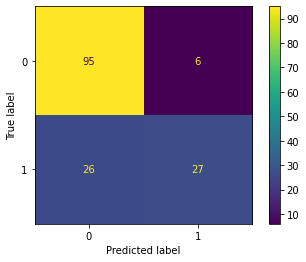

In [68]:
metrics.ConfusionMatrixDisplay.from_estimator(clf, Xtest_values, ytest_values) 

Question 8 

Use a Naïve Bayes model to classify the locations below as either New Hampshire or Vermont
from the 5 training examples, with and without Laplacian smoothing (please note, some states
have towns that have the same name). You must show the probability of the towns in the test set
with respect to each class for full credit. Please follow the method presented in class and show
your steps. You CANNOT use sklearn for this task (20 pts).

In [69]:
table = pd.DataFrame({'Dataset': ['Train', 'Train', 'Train', 'Train', 'Train', 'Test'],
              'Towns': ['Burlington, Rutland, Springfield',
                        'Springfield, Lebanon, Hanover',
                        'White River Junction, Hartford, Shelburne',
                        'Concord, Nashua, Lyme', 
                        'Shelburne, Claremont, Springfield',
                        'Springfield, Shelburne, Manchester'],
              'State': ['Vermont', 
                        'New Hampshire', 
                        'Vermont', 
                        'New Hampshire', 
                        'New Hampshire', 
                        '?']})
table

,Dataset,Towns,State
0,Train,"Burlington, Rutland, Springfield",Vermont
1,Train,"Springfield, Lebanon, Hanover",New Hampshire
2,Train,"White River Junction, Hartford, Shelburne",Vermont
3,Train,"Concord, Nashua, Lyme",New Hampshire
4,Train,"Shelburne, Claremont, Springfield",New Hampshire
5,Test,"Springfield, Shelburne, Manchester",?


Laplace Smoothing Steps

In [70]:
# Step 1 Probability of the classes

prob_VT = 0.4
prob_NH = 0.6

# Step 2:  Probabilty of each town the the classes with respect to each class

# N(Springfield, Vermont) + 1 / N(Springfield,Vermont) + 1 + N(Rutland, Vermont) + 1 + N(Burlington, Vermont) + 1 + N(White River, Vermont) + 1 
# + N(Shelburne,Vermont) + 1 + N(Hartford,Vermont) + 1 = 0.16666
prob_spring_VT = 0.16666 

# N(Manchester, Vermont) + 1 / N(Springfield,Vermont) + 1 + N(Rutland, Vermont) + 1 + N(Burlington, Vermont) + 1 + N(White River, Vermont) + 1 
# + N(Shelburne,Vermont) + 1 + N(Hartford,Vermont) + 1 = 0.0833
prob_manch_VT = 0.0833

# N(Shelburne, Vermont) + 1 / N(Springfield,Vermont) + 1 + N(Rutland, Vermont) + 1 + N(Burlington, Vermont) + 1 + N(White River, Vermont) + 1 
# + N(Shelburne,Vermont) + 1 + N(Hartford,Vermont) + 1 = 0.1666
prob_shel_VT = 0.1666

# N(Springfield, New Hampshire) + 1 / N(Springfield, New Hampshire) + 1 + N(Lebanon, New Hampshire) + 1 + N(Hanover, New Hampshire) + 1 
# + N(Concord, New Hampshire) + 1 + N(Nashua, New Hampshire) + 1 + N(Lyme, New Hampshire) + 1  + N(Shelburne,New Hampshire) + 1 
# + N(Claremont,New Hampshire) + 1 =  3 / 17 = 0.176
prob_spring_NH = 0.176

# N(Manchester, New Hampshire) + 1 / N(Springfield, New Hampshire) + 1 + N(Lebanon, New Hampshire) + 1 + N(Hanover, New Hampshire) + 1 
# + N(Concord, New Hampshire) + 1 + N(Nashua, New Hampshire) + 1 + N(Lyme, New Hampshire) + 1  + N(Shelburne,New Hampshire) + 1 
# + N(Claremont,New Hampshire) + 1 = 1/17
prob_manch_NH = 0.058

# N(Shelburne, New Hampshire) + 1 / N(Springfield, New Hampshire) + 1 + N(Lebanon, New Hampshire) + 1 + N(Hanover, New Hampshire) + 1 
# + N(Concord, New Hampshire) + 1 + N(Nashua, New Hampshire) + 1 + N(Lyme, New Hampshire) + 1  + N(Shelburne,New Hampshire) + 1 
# + N(Claremont,New Hampshire) + 1 = 2/17

prob_shel_NH = 0.1176

# Step 3 Computing Prior Probabilities

prob_c6_given_NH = prob_spring_NH * prob_manch_NH * prob_shel_NH
print("Probability of c6 given New Hampshire is", prob_c6_given_NH)
prob_c6_given_VT = prob_spring_VT * prob_manch_VT * prob_shel_VT
print("Probability of c6 given New Vermont is", prob_c6_given_VT)

# STep 4 Computing Posterior Probability

p_NH_given_c6 = prob_c6_given_NH * prob_NH
p_VT_given_c6 = prob_c6_given_VT * prob_VT

print("Probability of New Hampshire given c6 is", p_NH_given_c6)
print("Probability of Vermont given c6 is", p_VT_given_c6)

pred_state = p_NH_given_c6 / p_VT_given_c6 
print(pred_state)

#p_NH_given_c6 / p_VT_given_c6 < 1 so it is classified as Vermont

Probability of c6 given New Hampshire is 0.0012004608
Probability of c6 given New Vermont is 0.0023128708148
Probability of New Hampshire given c6 is 0.00072027648
Probability of Vermont given c6 is 0.00092514832592
0.7785524329666076


p_NH_given_c6 / p_VT_given_c6 < 1 so it is classified as Vermont 

Without Laplace Smoothing

N(Springfield, Vermont)/ N(Springfield,Vermont)+ N(Rutland, Vermont) + N(Burlington, Vermont) + N(White River, Vermont) + N(Shelburne,Vermont) + N(Hartford,Vermont) = 0.16666

P(Springfield | Vermont) = 0.16666 

N(Manchester, Vermont)  / N(Springfield,Vermont)  + N(Rutland, Vermont) + N(Burlington, Vermont) + N(White River, Vermont)
+ N(Shelburne,Vermont) + N(Hartford,Vermont) = 0.0833

P(Manchester | Vermont) = 0


Because Manchester isn't in the training dataset, Without Laplace smoothing is not possible to calculate as the posterior and prior probabilites will all end up being 0